In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from PIL import Image
import matplotlib
import plotly
import PIL
import seaborn as sb


# PRESETS
FIG_FONT = dict(family="Helvetica, Arial", size=14, color="#7f7f7f")
LABEL_COLORS = [px.colors.label_rgb(px.colors.convert_to_RGB_255(x)) for x in sns.color_palette("Spectral", 15)]
LABEL_COLORS_WOUT_NO_FINDING = LABEL_COLORS[:8]+LABEL_COLORS[9:]

/Users/andrewlutsky/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
embeddings = np.load("chest-xray14_embeddings.npy")
annotation = pd.read_csv('Data_Entry_2017.csv')

annotation = annotation.rename(columns={'Image Index': 'img_id', 'Finding Labels': 'class_name', 'Patient ID':'patient_id', 'Patient Age':'age', 'Patient Gender': 'gender', 'View Position': 'view_position'})


annotation['class_name'] = annotation['class_name'].str.split('|')
knowledge_graph = annotation.copy()

preprocessed = annotation.explode('class_name').reset_index(drop=True)
#print(exploded_df.shape)
preprocessed.head(10)




,img_id,class_name,Follow-up #,patient_id,age,gender,view_position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_001.png,Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
3,00000001_002.png,Cardiomegaly,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
4,00000001_002.png,Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
5,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
6,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
7,00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168,0.168,NaN
8,00000003_002.png,Hernia,2,3,75,F,PA,2048,2500,0.168,0.168,NaN
9,00000003_003.png,Hernia,3,3,76,F,PA,2698,2991,0.143,0.143,NaN


In [3]:

knowledge_graph = knowledge_graph[knowledge_graph['class_name'].apply(lambda x: x != ['No Finding'])]

knowledge_graph.head(20)




,img_id,class_name,Follow-up #,patient_id,age,gender,view_position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,[Cardiomegaly],0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,"[Cardiomegaly, Emphysema]",1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,"[Cardiomegaly, Effusion]",2,1,58,M,PA,2500,2048,0.168,0.168,NaN
4,00000003_000.png,[Hernia],0,3,81,F,PA,2582,2991,0.143,0.143,NaN
5,00000003_001.png,[Hernia],1,3,74,F,PA,2500,2048,0.168,0.168,NaN
6,00000003_002.png,[Hernia],2,3,75,F,PA,2048,2500,0.168,0.168,NaN
7,00000003_003.png,"[Hernia, Infiltration]",3,3,76,F,PA,2698,2991,0.143,0.143,NaN
8,00000003_004.png,[Hernia],4,3,77,F,PA,2500,2048,0.168,0.168,NaN
9,00000003_005.png,[Hernia],5,3,78,F,PA,2686,2991,0.143,0.143,NaN
10,00000003_006.png,[Hernia],6,3,79,F,PA,2992,2991,0.143,0.143,NaN


In [4]:

file_path = "selected_png_list.txt"
ids = []

with open(file_path, 'r') as file:
    for line in file:
        full_path = line.strip()  
        filename = os.path.basename(full_path)
        ids.append(filename)

label_dict = annotation.set_index('img_id')['class_name'].to_dict()

labels = []
for id in ids:
    if label_dict[id] == 'No Finding':
        labels.append(0)
    else:
        labels.append(1)

labels_arr = np.array(labels)[:, np.newaxis]
embeddings_labeled = np.column_stack((embeddings, labels_arr))

filtered_df = preprocessed[preprocessed['img_id'].isin(ids)].copy()

print(filtered_df.shape)
filtered_df.head(20)



(12118, 12)


,img_id,class_name,Follow-up #,patient_id,age,gender,view_position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
19,00000005_002.png,No Finding,2,5,69,F,AP,2500,2048,0.168,0.168,NaN
21,00000005_004.png,No Finding,4,5,70,F,PA,2986,2991,0.143,0.143,NaN
26,00000006_000.png,No Finding,0,6,81,M,PA,2500,2048,0.168,0.168,NaN
33,00000011_000.png,Effusion,0,11,75,M,PA,2638,2449,0.143,0.143,NaN
34,00000011_001.png,No Finding,1,11,75,M,PA,2500,2048,0.168,0.168,NaN
36,00000011_003.png,No Finding,3,11,75,M,PA,2500,2048,0.168,0.168,NaN
42,00000012_000.png,Effusion,0,12,76,M,PA,2992,2991,0.143,0.143,NaN
43,00000012_000.png,Mass,0,12,76,M,PA,2992,2991,0.143,0.143,NaN
73,00000013_018.png,Effusion,18,13,60,M,AP,3056,2544,0.139,0.139,NaN
74,00000013_018.png,Infiltration,18,13,60,M,AP,3056,2544,0.139,0.139,NaN


(512, 512)
PC1 variance: 0.10726348
PC2 variance: 0.07446498
343 PCs explain 0.99 of variance
(9600, 2)


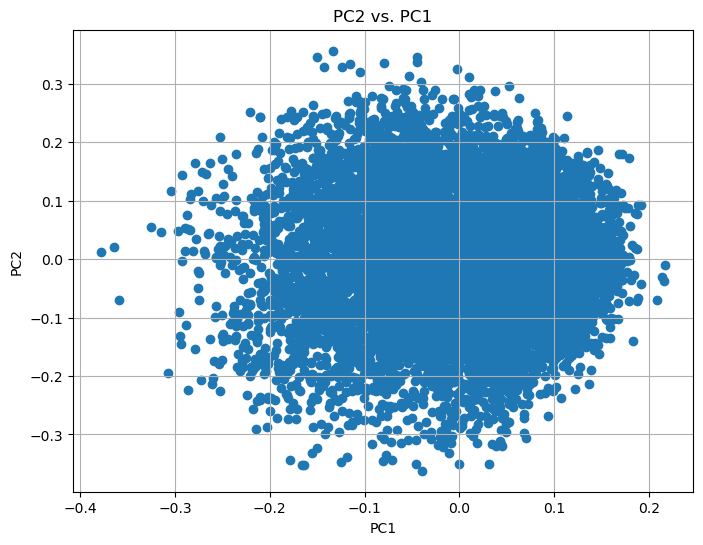

In [5]:
df = embeddings

mc_df = df - np.mean(df, axis=0)
N, k = mc_df.shape

S = (1/N) * mc_df.transpose() @ mc_df
print(S.shape)

eig_val, eig_vectors = np.linalg.eigh(S)

eig_val_desc = eig_val[::-1]
print("PC1 variance:", eig_val_desc[0]/np.sum(eig_val_desc))
print("PC2 variance:", eig_val_desc[1]/np.sum(eig_val_desc))

sum = 0
i = 0
while sum < 0.99:
    sum += (eig_val_desc[i]/np.sum(eig_val_desc))
    i += 1

print(i, "PCs explain 0.99 of variance")

reduced_df = mc_df @ eig_vectors[:, -2:]
print(reduced_df.shape)


x = reduced_df[:, 0]
y = reduced_df[:, 1]

# Creating the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.title('PC2 vs. PC1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.savefig('init_PCA.png', dpi=300)
plt.show()




In [6]:
fig = px.bar(filtered_df.class_name.value_counts().sort_index(), 
             color=filtered_df.class_name.value_counts().sort_index().index, opacity=0.85,
             color_discrete_sequence=LABEL_COLORS, log_y=True,
             labels={"y":"Annotations Per Class", "x":""},
             title="<b>Annotations Per Class</b>",)
fig.update_layout(
    legend_title=None,
    font=FIG_FONT,
    xaxis_title="",
    yaxis_title="<b>Annotations Per Class</b>",
    showlegend=False,  # This will remove the legend
    xaxis_tickangle=-90,  # Rotate the x-axis tick labels to be vertical
    xaxis_tickfont=dict(size=16)  # Increase the font size of x-axis tick labels
)
fig.write_image('annotations_by_class_high_res.png', width=2000, height=1200, scale=3)
fig.show()

In [7]:
feature_1 = embeddings[:, 140]
feature_2 = embeddings[:, 155]
feature_3 = embeddings[:, 101]

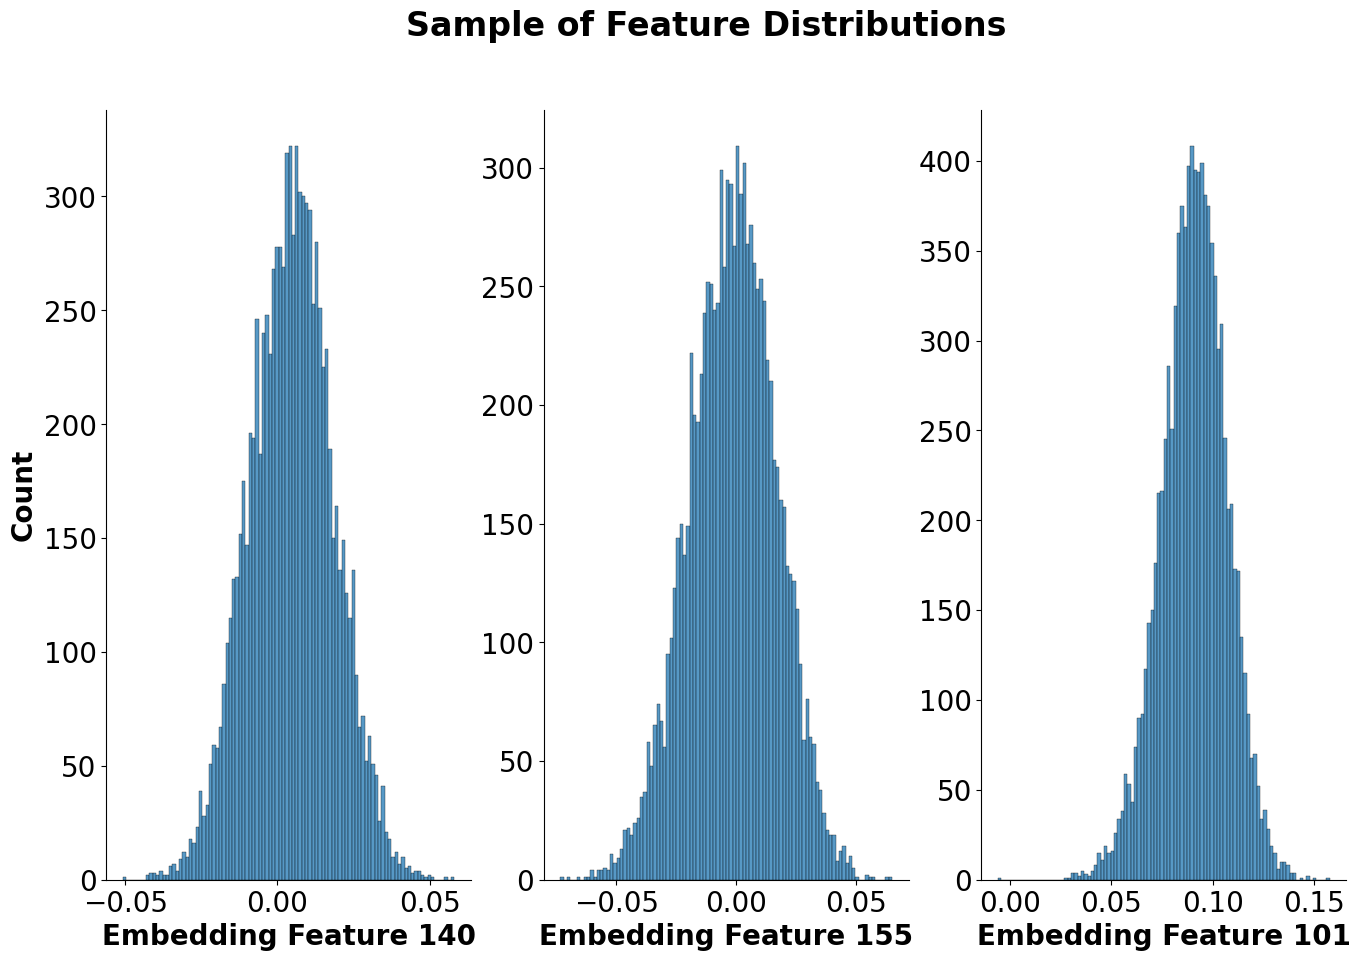

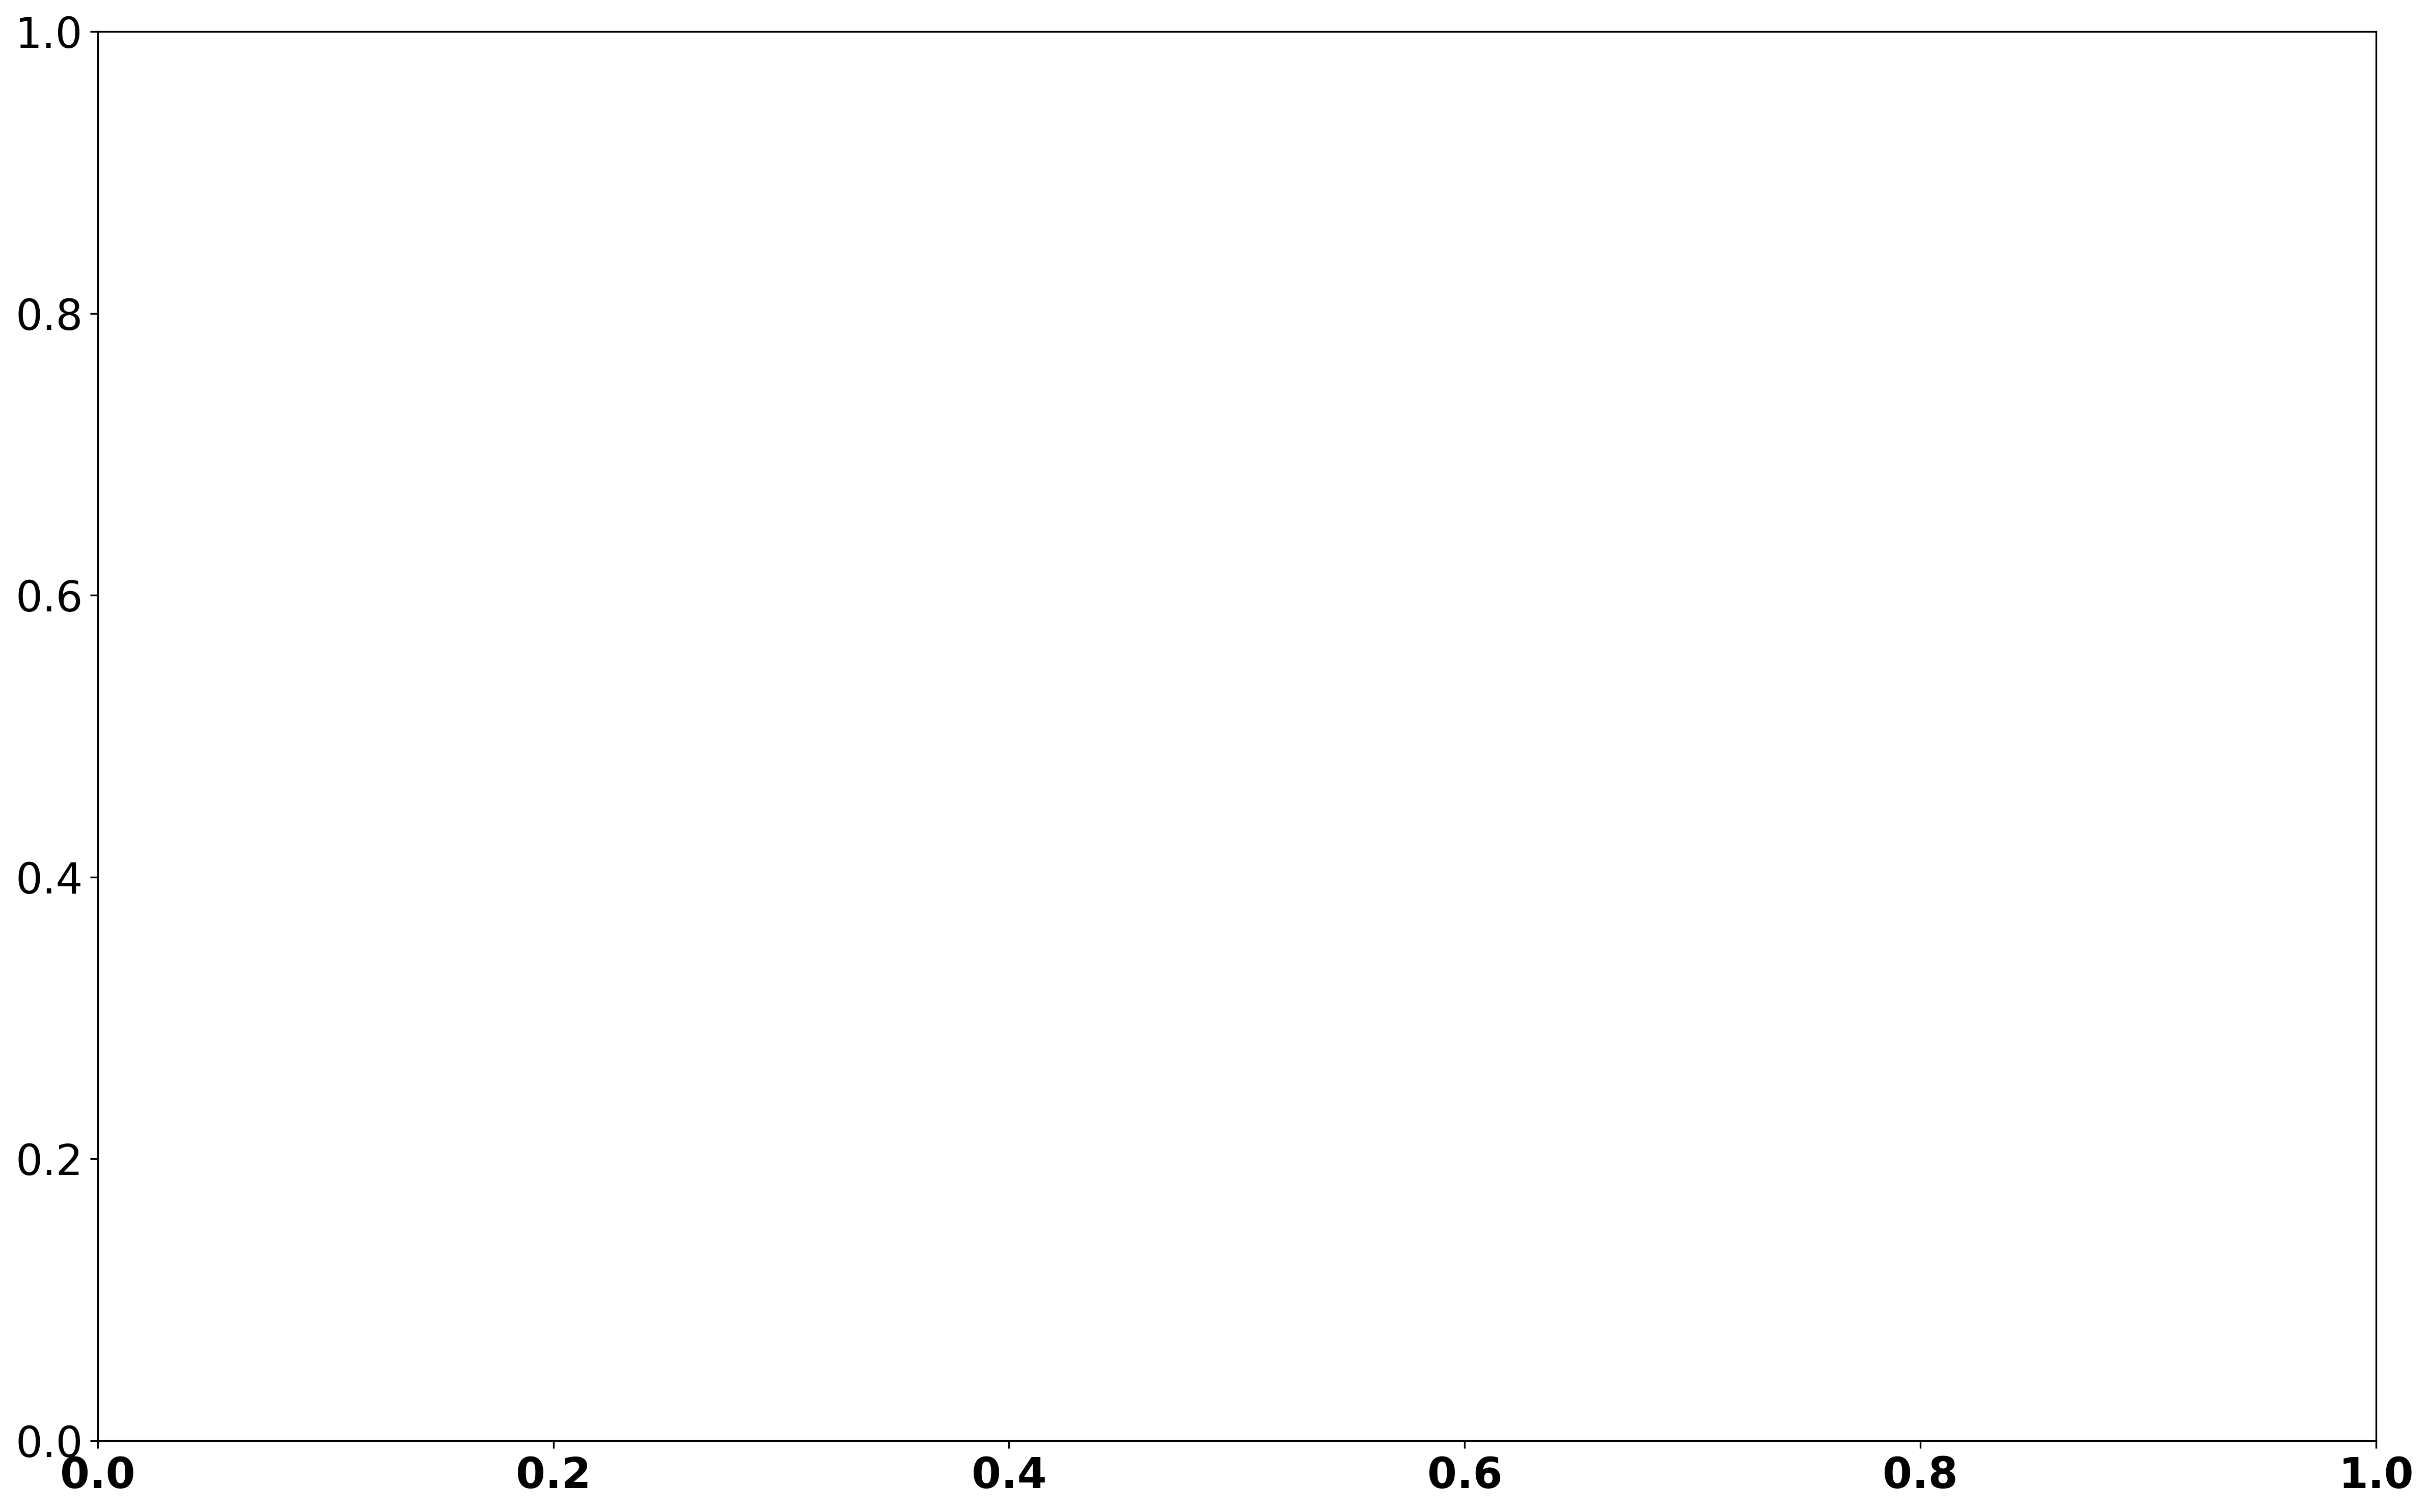

In [46]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16,10))
#plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams.update({
    'axes.labelsize': 20,  # Global label size for all axes
    'ytick.labelsize': 20,
    'font.family': 'sans-serif',
    'xtick.labelsize': 20
})
plt.figure(figsize=(16, 10), dpi=300)
sb.histplot(feature_1, ax= axs[0], bins = 100)
sb.histplot(feature_2, ax= axs[1], bins = 100)
sb.histplot(feature_3, ax= axs[2], bins = 100)

axs[0].set_xlabel("Embedding Feature 140", fontsize = 20, fontweight='bold')
axs[1].set_xlabel("Embedding Feature 155", fontsize = 20,fontweight='bold')
axs[2].set_xlabel("Embedding Feature 101", fontsize = 20, fontweight='bold')
axs[0].set_ylabel("Count", fontweight='bold')
axs[1].set_ylabel("")
axs[2].set_ylabel("")



for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
fig.suptitle("Sample of Feature Distributions", fontsize=24, fontweight = 'bold')
plt.xticks(fontweight='bold')

plt.tight_layout()
plt.savefig("FeatDistr.png")
plt.show()

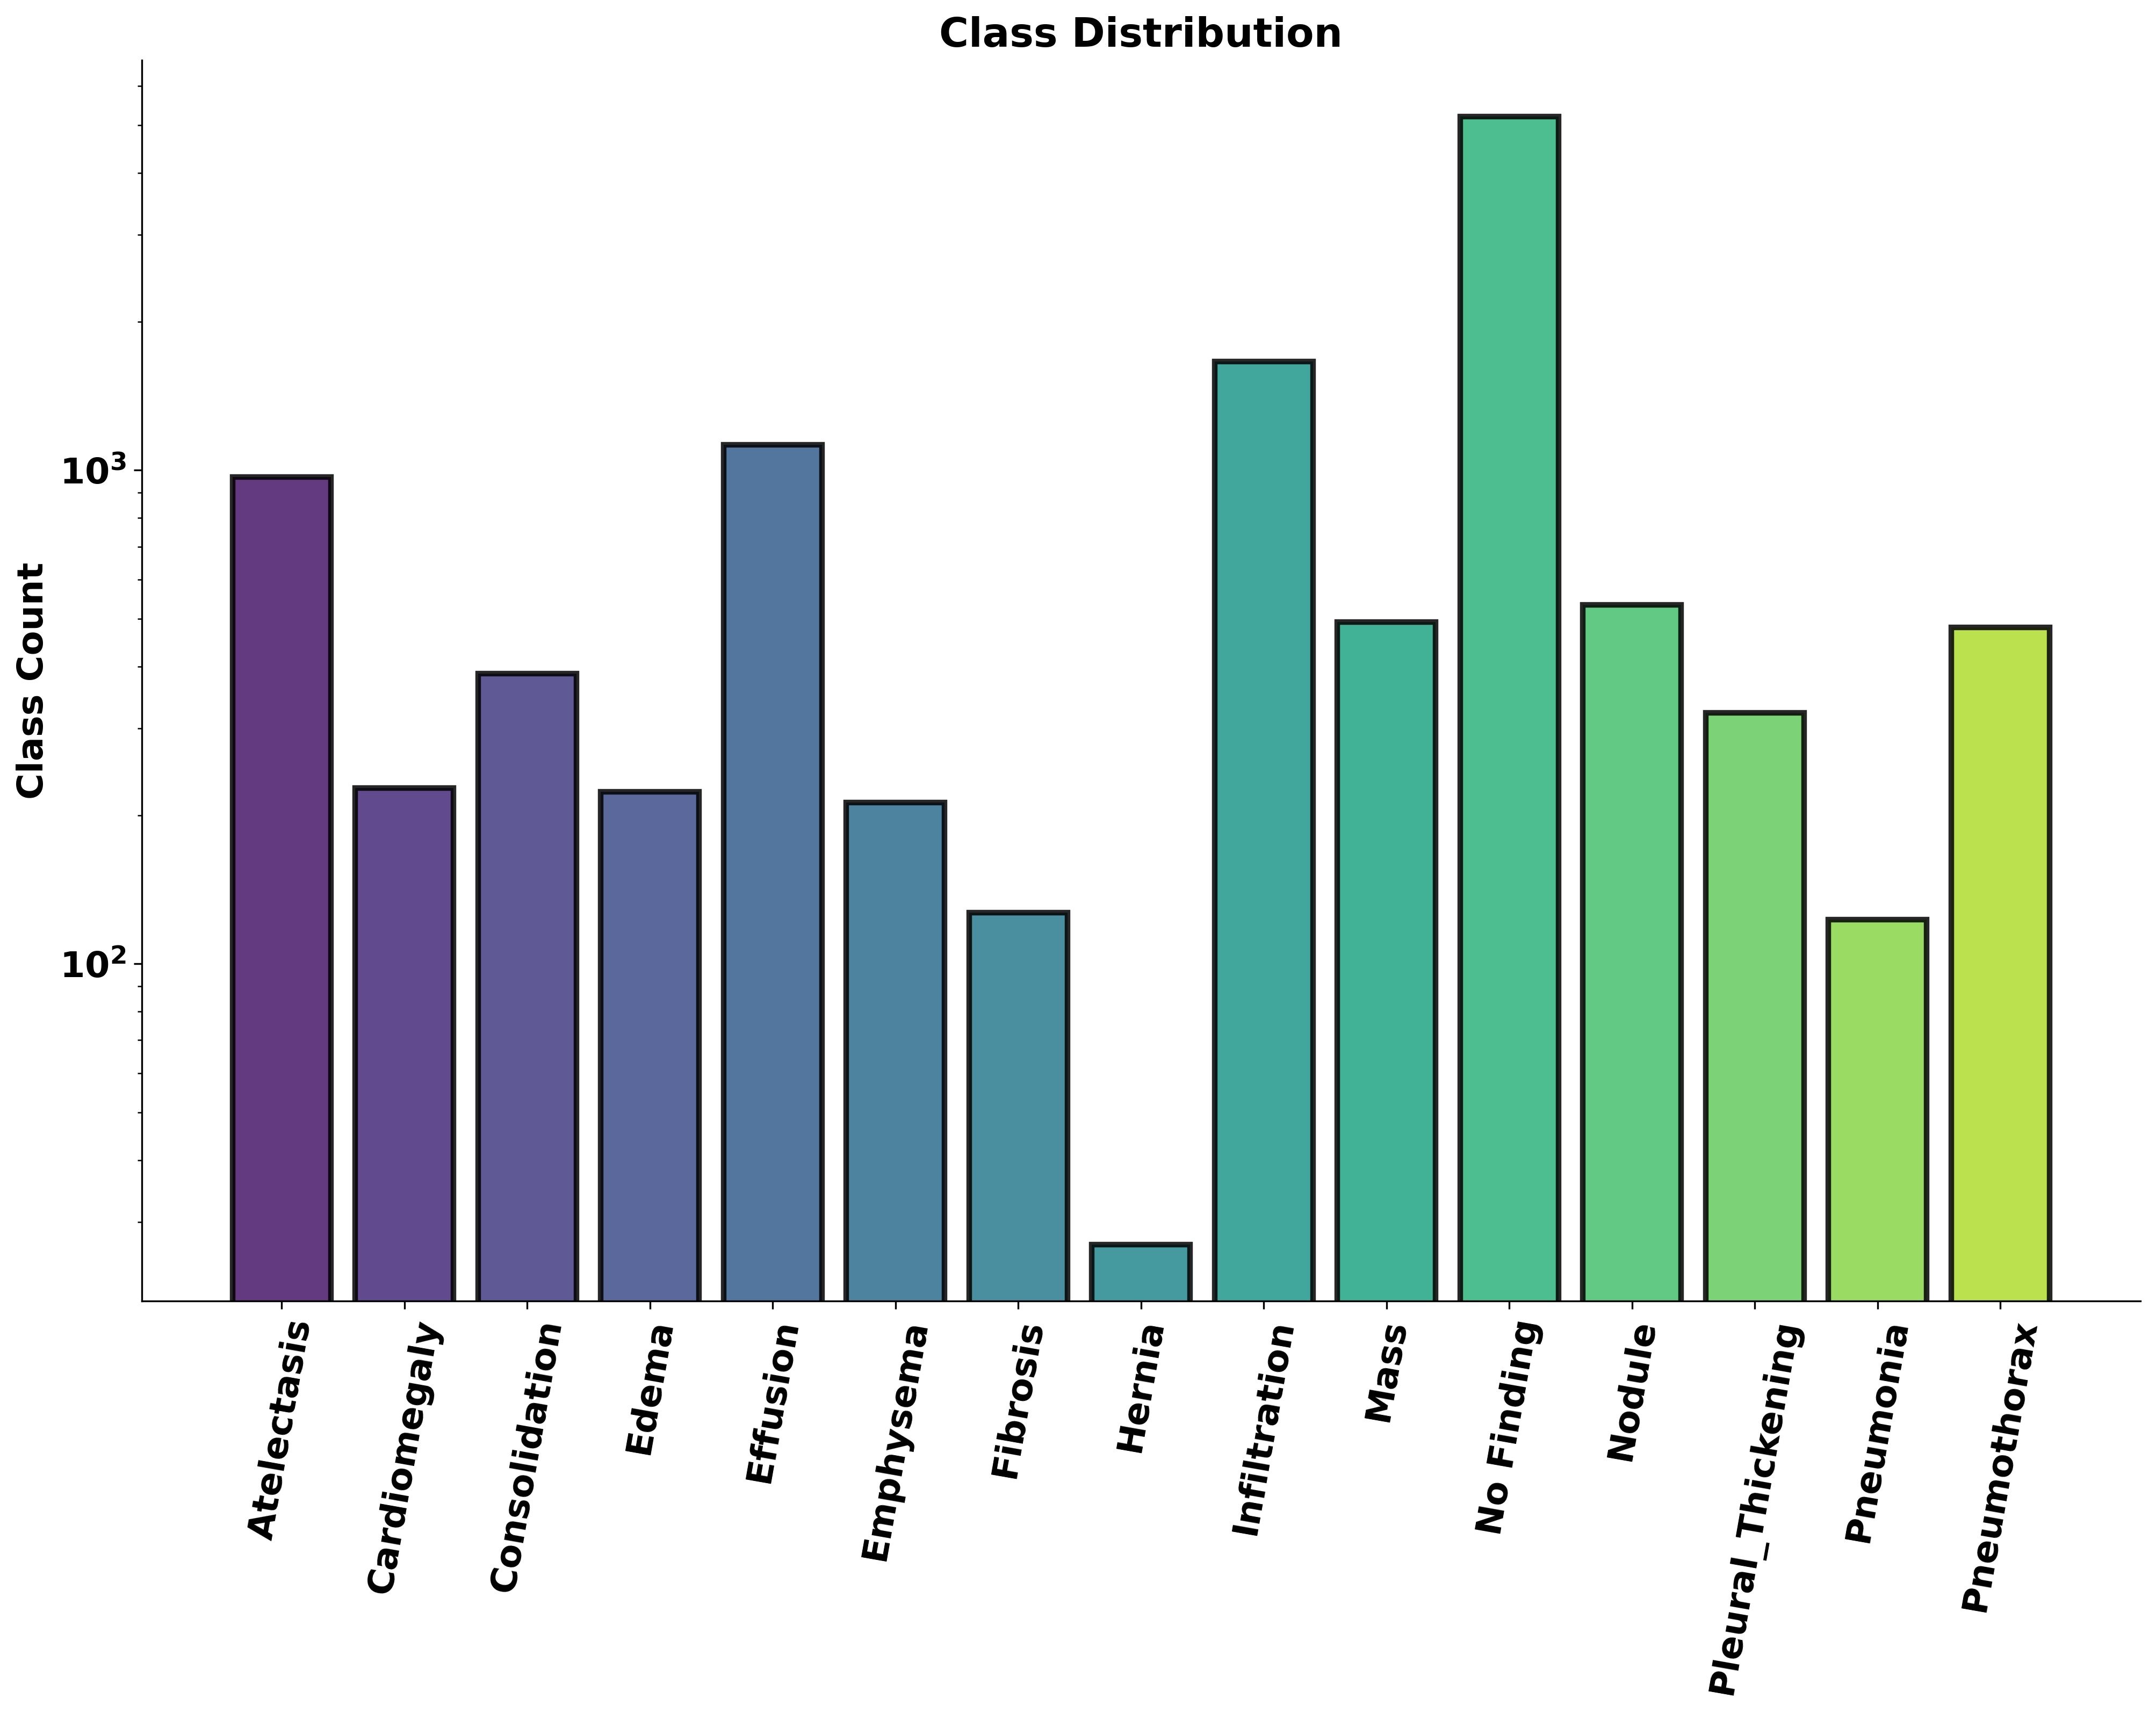

In [30]:
plt.rcParams.update({
    'axes.labelsize': 16,  # Global label size for all axes
    'ytick.labelsize': 16
})
# Assuming 'filtered_df' and 'LABEL_COLORS' are predefined as per your context
class_counts = filtered_df['class_name'].value_counts().sort_index()

# Create a new figure and axis object
fig, ax = plt.subplots(figsize=(16, 10), dpi = 300)  # Set figure size

colors = sb.color_palette('viridis', 16)

# Generate the bar plot
bars = ax.bar(class_counts.index, class_counts, color=colors, log=True, linewidth = 2.5, edgecolor='black')

# Set opacity for each bar
for bar in bars:
    bar.set_alpha(0.85)

# Set labels and titles
ax.set_xlabel('', fontsize=16, fontweight='bold')  # Empty string as x-label as per original code
ax.set_ylabel('Class Count', fontsize=16, fontweight='bold')
ax.set_title('Class Distribution', fontsize=18, fontweight='bold')
# Rotate the x-axis tick labels to be vertical and increase font size
plt.xticks(rotation=80, fontsize=16, fontweight="bold")
plt.yticks(fontweight="bold")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save the figure
plt.savefig('class_distribution.png', dpi=300)  # dpi is a way to control the resolution

# Show the plot
plt.show()